In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [17]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [45]:

def show(index):
    plt.figure(figsize=(15, 3))
    plt.imshow(X_train[index])
    print(y_train[index])
    plt.axis('off')

[8]


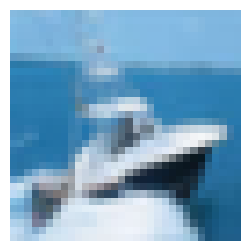

In [46]:
show(8)

[9]


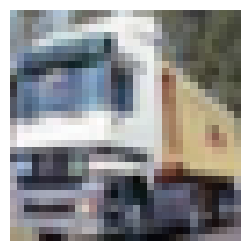

In [47]:
show(1)

In [35]:
X_train_cifar = X_train.astype("float32") / 255.0
X_test_cifar = X_test.astype("float32") / 255.0

In [36]:
y_train_cifar = y_train.flatten()
y_test_cifar = y_test.flatten()

In [38]:
X_train_cifar.shape, y_train_cifar.shape

((50000, 32, 32, 3), (50000,))

## Using pretrained model and just changing shape of the data using resizing

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2

TARGET_SHAPE = (224, 224, 3)
CIFAR_SHAPE = (32, 32, 3) 
NUM_CLASSES = 10 

base_model = MobileNetV2(input_shape=TARGET_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False 

model = Sequential([ 
    tf.keras.Input(shape=CIFAR_SHAPE),
    
    Resizing(TARGET_SHAPE[0], TARGET_SHAPE[1]),

    # Filter layers
    base_model,
    
    # Classification Head
    GlobalAveragePooling2D(),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_4 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [60]:
import numpy as np

raw_predictions = model.predict(X_test_cifar)

predicted_classes = np.argmax(raw_predictions, axis=1)

print("--- Prediction Complete ---")
print(f"Raw predictions shape (Probabilities for 10 classes): {raw_predictions.shape}")
print(f"First 5 predicted classes: {predicted_classes[:5]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 252s 801ms/step
--- Prediction Complete ---
Raw predictions shape (Probabilities for 10 classes): (10000, 10)
First 5 predicted classes: [0 0 0 0 0]


In [ ]:
y_test[:5]

#### Can also use this pretrained model as adjusted weight model as per the dataset